##### Installing Specific Libraries

installing specific libraries

App store scraper
> pip install app_store_scraper 

google play store scraper
> pip install google-play-scraper

##### Importing Libraries

In [244]:
#Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import json 
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm
import scipy.stats as stats

#App store and Google play scraping
from google_play_scraper import app, Sort, reviews, reviews_all
from app_store_scraper import AppStore


# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.io as pio

import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cornel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

##### Project brief




(Fairmoney, Branch, Palmcredit, Carbon, Quickcredit)

Loan Apps to use:
> Fair Money
    > App Store: Unavailable on Appstore
       app name: 
       app_id: 
       country: ng
    
    > Google Store: (https://play.google.com/store/apps/details?id=ng.com.fairmoney.fairmoney&hl=en)
        app_id: ng.com.fairmoney.fairmoney 
        country: ng
            
> Branch
    > App Store: Unavailable on Appstore
       app name: 
       app_id: 
       country: ng
    
    > Google Store: (https://play.google.com/store/apps/details?id=com.branch_international.branch.branch_demo_android )
        app_id: com.branch_international.branch.branch_demo_android 
        country: ng

> Palmcredit
    > App Store: Unavailable on Appstore
       app name: 
       app_id: 
       country: ng
    
    > Google Store: https://play.google.com/store/apps/details?id=com.transsnetfinancial.palmcredit&hl=en&gl=NG
        app_id: com.transsnetfinancial.palmcredit
        country: ng

> Carbon
    > App Store: https://apps.apple.com/ng/app/carbon-secure-banking-loans/id1494856668 
       app name: Carbon: Secure banking & loans
       app_id: 1494856668
       country: ng
    
    > Google Store: (https://play.google.com/store/apps/details?id=com.lenddo.mobile.paylater)
        app_id: com.lenddo.mobile.paylater 
        country: ng

> Quickcredit
    > App Store: https://apps.apple.com/ng/app/quickcredit/id1564215866
       app name: QuickCredit 
       app_id: 1564215866
       country: ng
    
    > Google Store: (https://play.google.com/store/apps/details?id=com.cash.loan.credit.quick.kash.cash9ja.mobile9.mkopo.instant.online.gocash )
        app_id:  com.cash.loan.credit.quick.kash.cash9ja.mobile9.mkopo.instant.online.gocash 
        country: ng

> Newcredit
    > App Store: https://apps.apple.com/ng/app/newcredit/id6444618359
       app name: Newcredit  
       app_id: 6444618359 
       country: ng
    
    > Google Store: (https://play.google.com/store/apps/details?id=com.pbank.newcredit )
        app_id: com.pbank.newcredit 
        country: ng

##### Extracting Reviews from Apple's Appstore

In [2]:
#Apples - AppStore
carbon_app = AppStore(country='ng', app_name='Carbon: Secure banking & loans', app_id = '1494856668')
quickcredit_app = AppStore(country='ng', app_name='QuickCredit', app_id = '1564215866')
newcredit_app = AppStore(country='ng', app_name='Newcredit', app_id = '6444618359')

# carbon_app.review(how_many=2000)
# quickcredit_app.review(how_many=2000)
# newcredit_app.review(how_many=2000)


2023-01-24 14:33:29,179 [INFO] Base - Initialised: AppStore('ng', 'carbon-secure-banking-loans', 1494856668)
2023-01-24 14:33:29,179 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ng/app/carbon-secure-banking-loans/id1494856668
2023-01-24 14:33:30,626 [INFO] Base - Initialised: AppStore('ng', 'quickcredit', 1564215866)
2023-01-24 14:33:30,626 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ng/app/quickcredit/id1564215866
2023-01-24 14:33:31,795 [INFO] Base - Initialised: AppStore('ng', 'newcredit', 6444618359)
2023-01-24 14:33:31,795 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/ng/app/newcredit/id6444618359


In [3]:
carbon_app.review(how_many=2000)

2023-01-24 14:33:43,200 [INFO] Base - [id:1494856668] Fetched 160 reviews (160 fetched in total)
2023-01-24 14:33:49,019 [INFO] Base - [id:1494856668] Fetched 340 reviews (340 fetched in total)
2023-01-24 14:33:54,889 [INFO] Base - [id:1494856668] Fetched 520 reviews (520 fetched in total)
2023-01-24 14:34:01,084 [INFO] Base - [id:1494856668] Fetched 700 reviews (700 fetched in total)
2023-01-24 14:34:06,966 [INFO] Base - [id:1494856668] Fetched 880 reviews (880 fetched in total)
2023-01-24 14:34:07,618 [INFO] Base - [id:1494856668] Fetched 897 reviews (897 fetched in total)


In [4]:
quickcredit_app.review(how_many=2000)

2023-01-24 14:34:14,176 [INFO] Base - [id:1564215866] Fetched 102 reviews (102 fetched in total)


In [5]:
newcredit_app.review(how_many=2000)

2023-01-24 14:34:20,815 [INFO] Base - [id:6444618359] Fetched 42 reviews (42 fetched in total)


In [ ]:
#Apple's - App Store
#converting from a JSON format to a dataframe:

#1. Carbon Loan App
carbon_app1 = pd.DataFrame(np.array(carbon_app.reviews),columns=['review'])  #apple format
carbon_app1 = carbon_app1.join(pd.DataFrame(carbon_app1.pop('review').tolist()))

#2. QuickCredit Loan App
quickcredit_app1 = pd.DataFrame(np.array(quickcredit_app.reviews),columns=['review'])    #apple format
quickcredit_app1 = quickcredit_app1.join(pd.DataFrame(quickcredit_app1.pop('review').tolist()))

#3. NewCredit Loan App
newcredit_app1 = pd.DataFrame(np.array(newcredit_app.reviews),columns=['review'])    #apple format
newcredit_app1 = newcredit_app1.join(pd.DataFrame(newcredit_app1.pop('review').tolist()))

In [ ]:
# carbon_app1.head()
# quickcredit_app1.head()
# newcredit_app1.head()

In [ ]:
#convert data from Apple reviews to csv
carbon_app1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\Carbon-appstore-reviews.csv', 
                   index = False)
quickcredit_app1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\quickcredit-appstore-reviews.csv', 
                        index = False) 
newcredit_app1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\newcredit-appstore-reviews.csv', 
                      index = False)

##### Extractng Reviews from Google's Playstore

In [ ]:
#documentary for google play scraper (https://pypi.org/project/google-play-scraper/)

#check if the app is available 
from google_play_scraper import app
result = app(
    'com.branch_international.branch.branch_demo_android',
    lang='en', # defaults to 'en'
    country='us' # defaults to 'us'
)

result

In [12]:
#google  play store
fairmoney_google = reviews_all(
    'ng.com.fairmoney.fairmoney', 
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

branch_google = reviews_all(
    'com.branch_international.branch.branch_demo_android', 
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

palmcredit_google = reviews_all(
    'com.transsnetfinancial.palmcredit', 
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

carbon_google = reviews_all(
    'com.lenddo.mobile.paylater',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

quickcredit_google = reviews_all(
    'com.cash.loan.credit.quick.kash.cash9ja.mobile9.mkopo.instant.online.gocash',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

newcredit_google = reviews_all(
    'com.pbank.newcredit',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ng', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

ExtraHTTPError: App not found. Status code 400 returned.

In [ ]:
#Google Play Store
#converting from a JSON format to a dataframe

#1. Carbon Loan App
carbon_google1 = pd.DataFrame(np.array(carbon_google),columns=['review'])   #google format
carbon_google1 = carbon_google1.join(pd.DataFrame(carbon_google1.pop('review').tolist()))

#2. Quickcredit Loan App
quickcredit_google1 = pd.DataFrame(np.array(quickcredit_google),columns=['review']) #google format
quickcredit_google1 = quickcredit_google1.join(pd.DataFrame(quickcredit_google1.pop('review').tolist()))

#3. Newcredit Loan App
newcredit_google1 = pd.DataFrame(np.array(newcredit_google),columns=['review']) #google format
newcredit_google1 = newcredit_google1.join(pd.DataFrame(newcredit_google1.pop('review').tolist()))

#4. Fairmoney Loan App
fairmoney_google1 = pd.DataFrame(np.array(fairmoney_google),columns=['review']) #google format
fairmoney_google1 = fairmoney_google1.join(pd.DataFrame(fairmoney_google1.pop('review').tolist()))

#5. Branch Loan App
branch_google1 = pd.DataFrame(np.array(branch_google),columns=['review']) #google format
branch_google1 = branch_google1.join(pd.DataFrame(branch_google1.pop('review').tolist()))

#6. Palmcredit Loan App
palmcredit_google1 = pd.DataFrame(np.array(palmcredit_google),columns=['review']) #google format
palmcredit_google1 = palmcredit_google1.join(pd.DataFrame(palmcredit_google1.pop('review').tolist()))

In [ ]:
#convert data from Google play reviews to csv
carbon_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\Carbon-googleplay-reviews.csv', 
                   index = False)
quickcredit_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\quickcredit-googleplay-reviews.csv', 
                   index = False)
newcredit_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\newcredit-googleplay-reviews.csv', 
                   index = False)
fairmoney_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\fairmoney-googleplay-reviews.csv', 
                   index = False)
branch_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\branch-googleplay-reviews.csv', 
                   index = False)
palmcredit_google1.to_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\palmcredit-googleplay-reviews.csv', 
                   index = False)

##### Preprocessing reviews in the dataset

###### reload dataset

In [83]:
'''
    carbon = carbon_app1 + carbon_google1
    quickcheck = quickcredit_app1 + quickcredit_google1
    newcredit = newcredit_app1 + newcredit_google1
    fairmoney = fairmoney_google1
    branch = branch_google1
    palmcredit = palmcredit_google1
'''
#reload dataset
#carbon Loan App
carbon_google1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\Carbon-googleplay-reviews.csv', 
                   )
carbon_app1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\Carbon-appstore-reviews.csv', 
                   )
# cabon = cabon_app1.merge(carbon_google1, on = )

#quickcheck Loan App
quickcredit_google1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\quickcredit-googleplay-reviews.csv', 
                   )
quickcredit_app1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\quickcredit-appstore-reviews.csv', 
                    ) 
# quickcheck = cabon_app1.merge(carbon_google1, on = )

#newcredit loan app
newcredit_google1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\newcredit-googleplay-reviews.csv', 
                  )
newcredit_app1 = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\newcredit-appstore-reviews.csv', 
                    )
# newcredit = cabon_app1.merge(carbon_google1, on = )

#fairmoney Loan App
fairmoney = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\fairmoney-googleplay-reviews.csv', 
                   )

#branch Loan App
branch = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\branch-googleplay-reviews.csv', 
                  )

#Palmcredit Loan App
palmcredit = pd.read_csv(r'C:\Users\Cornel\Documents\5. Projects\Project 1 - Loan App Reviews\Sentiment Analysis\data\raw\palmcredit-googleplay-reviews.csv', 
                   )



######  brief preprocessing (renaming columns appropriately and droping irrelevant columns)

In [84]:
#brief preprocessing (renaming columns appropriately and droping irrelevant columns)
#Google Playstore
carbon_google1 = carbon_google1.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})
quickcredit_google1 = quickcredit_google1.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})
newcredit_google1 = newcredit_google1.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})
fairmoney = fairmoney.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})
branch = branch.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})
palmcredit = palmcredit.rename(columns={'content': 'title', 'score': 'rating', "at": "date", "replyContent": "developerResponse", "repliedAt": "developerResponseDate"})

# # #Apple Appstore
carbon_app1.drop("isEdited", axis=1, inplace = True)
quickcredit_app1.drop("isEdited", axis=1, inplace = True)
newcredit_app1.drop("isEdited", axis=1, inplace = True)
# carbon_app1.head()

#parsing dates and sorting dataframe by dates
carbon_google1[["date", "developerResponseDate"]] = carbon_google1[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
carbon_google1 = carbon_google1.sort_values(by = ['date'], ascending = False)
carbon_app1["date"] = pd.to_datetime(carbon_app1["date"], infer_datetime_format=True)
carbon_app1 = carbon_app1.sort_values(by = ['date'], ascending = False)

quickcredit_google1[["date", "developerResponseDate"]] = quickcredit_google1[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
quickcredit_google1 = quickcredit_google1.sort_values(by = ['date'], ascending = False)
quickcredit_app1["date"] = pd.to_datetime(quickcredit_app1["date"], infer_datetime_format=True)
quickcredit_app1 = quickcredit_app1.sort_values(by = ['date'], ascending = False)

newcredit_google1[["date", "developerResponseDate"]] = newcredit_google1[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
newcredit_google1 = newcredit_google1.sort_values(by = ['date'], ascending = False)
newcredit_app1["date"] = pd.to_datetime(newcredit_google1["date"], infer_datetime_format=True)
newcredit_app1 = newcredit_app1.sort_values(by = ['date'], ascending = False)

fairmoney[["date", "developerResponseDate"]] = fairmoney[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
fairmoney = fairmoney.sort_values(by = ['date'], ascending = False)

branch[["date", "developerResponseDate"]] = branch[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
branch = branch.sort_values(by = ['date'], ascending = False)

palmcredit[["date", "developerResponseDate"]] = palmcredit[["date", "developerResponseDate"]].apply(pd.to_datetime, infer_datetime_format=True)
palmcredit = palmcredit.sort_values(by = ['date'], ascending = False)




###### Removing Punctuations, Numbers, and Special Characters

In [125]:
#removing unwanted characters from titles, reviews, and developer responses

import re
pattern = '[^a-zA-Z0-9\s\.]'

carbon_google1[["developerResponse", "title"]] = carbon_google1[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)
carbon_app1[["review", "title"]] = carbon_app1[["review", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)

quickcredit_google1[["developerResponse", "title"]] = quickcredit_google1[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)
quickcredit_app1[["review", "title"]] = quickcredit_app1[["review", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)

newcredit_google1[["developerResponse", "title"]] = newcredit_google1[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)
newcredit_app1[["review", "title"]] = newcredit_app1[["review", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)

fairmoney[["developerResponse", "title"]] = fairmoney[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)
branch[["developerResponse", "title"]] = branch[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)
palmcredit[["developerResponse", "title"]] = palmcredit[["developerResponse", "title"]].apply(lambda x: re.sub(pattern, '', x) if isinstance(x, str) else x)


###### Removing Short Words

In [136]:
#We have to be a little careful here in selecting the length of the words which we want to remove. 
#So, I have decided to remove all the words having length 3 or less. 
#For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

#Googleplay Store
    #developerResponse
carbon_google1["developerResponse"] = carbon_google1["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
quickcredit_google1["developerResponse"] = quickcredit_google1["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x)
newcredit_google1["developerResponse"] = newcredit_google1["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
fairmoney["developerResponse"] = fairmoney["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
branch["developerResponse"] = branch["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
palmcredit["developerResponse"] = palmcredit["developerResponse"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
    #title
carbon_google1["title"] = carbon_google1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
quickcredit_google1["title"] = quickcredit_google1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
newcredit_google1["title"] = newcredit_google1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
fairmoney["title"] = fairmoney["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
branch["title"] = branch["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
palmcredit["title"] = palmcredit["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 


#For Appstore
    #review
carbon_app1["review"] = carbon_app1["review"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
quickcredit_app1["review"] = quickcredit_app1["review"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
newcredit_app1["review"] = newcredit_app1["review"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
    #title
carbon_app1["title"] = carbon_app1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 
quickcredit_app1["title"] = quickcredit_app1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x)
newcredit_app1["title"] = newcredit_app1["title"].str.split().apply(
    lambda x: ' '.join([w for w in x if len(w)>3]) if isinstance(x,list) else x) 



###### Tokenization



#NB: for Googleplay store. The reviews are in the column ["title"], while there is another column for ["developerResponse"]
#NB: for Applestore. The reviews are in the column ["review"], while there is another column for ["title"]

All variables:

carbon_google1 
carbon_app1

quickcredit_google1
quickcredit_app1

newcredit_google1
newcredit_app1

fairmoney
branch
palmcredit


In [139]:
#Now we will tokenize all the cleaned tweets in our dataset. 
#Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

#Quickcredit Loan App
#Google play store
quickcredit_google1_reviews = quickcredit_google1["title"].apply(lambda x: x.split())
quickcredit_google1_reviews.head(3)

#Appstore
quickcredit_app1_reviews = quickcredit_app1['review'].apply(lambda x: x.split())
quickcredit_app1_reviews.head(3)


9     [They, deducted, from, account, after, adding,...
15    [Your, agent, collected, money, from, refused,...
52    [support, agent, texting, calling, talkless, a...
Name: review, dtype: object

In [209]:
#Carbon Loan App

#Google play store
carbon_google1_reviews = carbon_google1["title"].str.split()
carbon_google1_reviews.head(3) 

#Appstore
carbon_app1_reviews = carbon_app1['review'].apply(lambda x: x.split())
carbon_app1_reviews.head(3)

AttributeError: Can only use .str accessor with string values!

In [143]:
#Newcredit Loan App

#Google play store
newcredit_google1_reviews = newcredit_google1["title"].apply(lambda x: x.split())
newcredit_google1_reviews.head(3)

#Appstore
newcredit_app1_reviews = newcredit_app1['review'].apply(lambda x: x.split())
newcredit_app1_reviews.head(3)

0    [will, debit, your, money, from, account, peop...
1    [trying, repay, loan, coming, I’ve, been, this...
2    [guys, aren’t, ready,, downloaded, after, succ...
Name: review, dtype: object

In [144]:
#Fairmoney Loan App
fairmoney_reviews = fairmoney["title"].apply(lambda x: x.split())
fairmoney_reviews.head(3)

0    [Fair, Money, please, you're, giving, money, a...
1    [borrow, many, time, loan, this, time, need, s...
2                        [process.., Technical, error]
Name: title, dtype: object

In [145]:
#Branch Loan App
branch_reviews = branch["title"].apply(lambda x: x.split())
branch_reviews.head(3)

0                                         [Best, used]
1                     [very, good, smooth, fast, loan]
2    [Excellent,, especially, savings, option, that...
Name: title, dtype: object

In [146]:
#PalmCredit Loan App
palmcredit_reviews = palmcredit["title"].apply(lambda x: x.split())
palmcredit_reviews.head(3)

0               [Palm, credit, very, very, good, best]
1    [like, just, removed, money, from, bank, accou...
2           [Awesomely, great, app,, very, responsive]
Name: title, dtype: object

 ###### Stemming

In [207]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

carbon_google1_reviews = carbon_google1_reviews.apply(lambda x: [stemmer.stem(i) for i in x] if hasattr(x, '__iter__') else x)
# carbon_google1_reviews.isnull().sum()

81552

In [158]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations 
#of the word – “play”.

from nltk.stem.porter import *
stemmer = PorterStemmer()

#Newcredit Loan App
newcredit_google1_reviews = newcredit_google1_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
newcredit_app1_reviews = newcredit_app1_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
    #->googleplaystore
for i in range(len(newcredit_google1_reviews)):
    newcredit_google1_reviews[i] = ' '.join(newcredit_google1_reviews[i])
newcredit_google1["title"] = newcredit_google1_reviews
    #->Appstore
for i in range(len(newcredit_app1_reviews)):
    newcredit_app1_reviews[i] = ' '.join(newcredit_app1_reviews[i])
newcredit_app1['review'] = newcredit_app1_reviews

#Carbon Loan App
carbon_google1_reviews = carbon_google1_reviews.apply(lambda x: [stemmer.stem(i) for i in x] if hasattr(x, '__iter__') else x)
carbon_app1_reviews = carbon_app1_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
    #->googleplay store
for i in range(len(carbon_google1_reviews)):
    if hasattr(carbon_google1_reviews[i], '__iter__'):
        carbon_google1_reviews[i] = ' '.join(carbon_google1_reviews[i]) #if hasattr(x, '__iter__') else x) 
carbon_google1["title"] = carbon_google1_reviews
    #->Appstore
for i in range(len(carbon_app1_reviews)):
    carbon_app1_reviews[i] = ' '.join(carbon_app1_reviews[i])
carbon_app1['review'] = carbon_app1_reviews

#Quickcredit Loan App
quickcredit_google1_reviews = quickcredit_google1_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
quickcredit_app1_reviews = quickcredit_app1_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
    #->googleplay store
for i in range(len(quickcredit_google1_reviews)):
    quickcredit_google1_reviews[i] = ' '.join(quickcredit_google1_reviews[i])
quickcredit_google1['title'] = quickcredit_google1_reviews
    #->Appstore
for i in range(len(quickcredit_app1_reviews)):
    quickcredit_app1_reviews[i] = ' '.join(quickcredit_app1_reviews[i])
quickcredit_app1['review'] = quickcredit_app1_reviews

#Fairmoney Loan App
fairmoney_reviews = fairmoney_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(fairmoney_reviews)):
    fairmoney_reviews[i] = ' '.join(fairmoney_reviews[i])
fairmoney["title"] = fairmoney_reviews

#Branch Loan App
branch_reviews = branch_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(branch_reviews)):
    branch_reviews[i] = ' '.join(branch_reviews[i])
branch["title"] = branch_reviews

#PalmCredit Loan App
palmcredit_reviews = palmcredit_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(palmcredit_reviews)):
    palmcredit_reviews[i] = ' '.join(palmcredit_reviews[i])
palmcredit["title"] = palmcredit_reviews


In [161]:


# #Newcredit Loan App
#     #googleplay store
# for i in range(len(newcredit_google1_reviews)):
#     newcredit_google1_reviews[i] = ' '.join(newcredit_google1_reviews[i])
# newcredit_google1["title"] = newcredit_google1_reviews
#     #Appstore
# for i in range(len(newcredit_app1_reviews)):
#     newcredit_app1_reviews[i] = ' '.join(newcredit_app1_reviews[i])
# newcredit_app1['review'] = newcredit_app1_reviews

# #Carbon Loan App
#  #googleplay store
# for i in range(len(carbon_google1_reviews)):
#     if hasattr(carbon_google1_reviews[i], '__iter__'):
#         carbon_google1_reviews[i] = ' '.join(carbon_google1_reviews[i]) #if hasattr(x, '__iter__') else x) 
# carbon_google1["title"] = carbon_google1_reviews
#     #Appstore
# for i in range(len(carbon_app1_reviews)):
#     carbon_app1_reviews[i] = ' '.join(carbon_app1_reviews[i])
# carbon_app1['review'] = carbon_app1_reviews

# #Quickcredit Loan App
#  #googleplay store
# for i in range(len(quickcredit_google1_reviews)):
#     quickcredit_google1_reviews[i] = ' '.join(quickcredit_google1_reviews[i])
# quickcredit_app1['review'] = quickcredit_google1_reviews
#     #Appstore
# for i in range(len(quickcredit_app1_reviews)):
#     quickcredit_app1_reviews[i] = ' '.join(quickcredit_app1_reviews[i])
# quickcredit_app1['review'] = quickcredit_app1_reviews

# #Fairmoney Loan App
# for i in range(len(fairmoney_reviews)):
#     fairmoney_reviews[i] = ' '.join(fairmoney_reviews[i])
# fairmoney["title"] = fairmoney_reviews

# #Branch Loan App
# for i in range(len(branch_reviews)):
#     branch_reviews[i] = ' '.join(branch_reviews[i])
# branch["title"] = branch_reviews

# #PalmCredit Loan App
# for i in range(len(palmcredit_reviews)):
#     palmcredit_reviews[i] = ' '.join(palmcredit_reviews[i])
# palmcredit["title"] = palmcredit_reviews


In [177]:
newcredit_google1["title"].head(-10)

0        o       n       l       i               n     ...
1        s       c       a       m               j     ...
2        i       '       v               r       e     ...
3        g       r       e       a       t             ...
4        p       a       i       d               l     ...
                               ...                        
25977    v       e       r       i               n     ...
25978    w       o       n       t               g     ...
25979                            g       o       o       d
25980    c       u       s       t       o       m     ...
25981    s       u       p       e       r       b     ...
Name: title, Length: 25982, dtype: object

###### Story Generation and Visualization from Tweets

> Understanding the common words used in the tweets: WordCloud

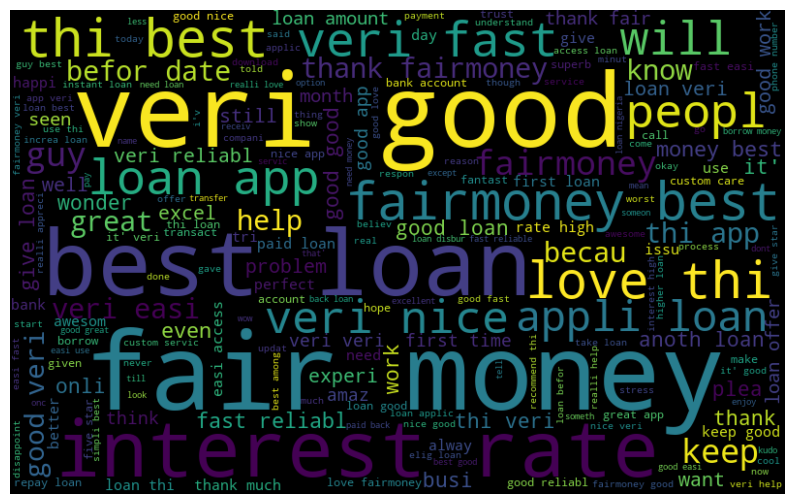

In [182]:
#Fairmoney Loan App
    #googleplay store
all_words_fairmoney = ' '.join([text for text in fairmoney["title"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_fairmoney)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



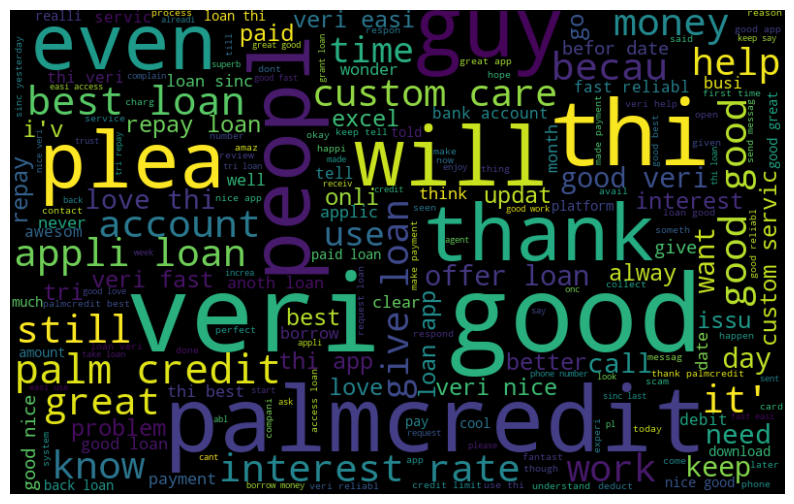

In [211]:
#Palmcredit Loan App
    #googleplay store
all_words_palmcredit = ' '.join([text for text in palmcredit["title"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_palmcredit)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



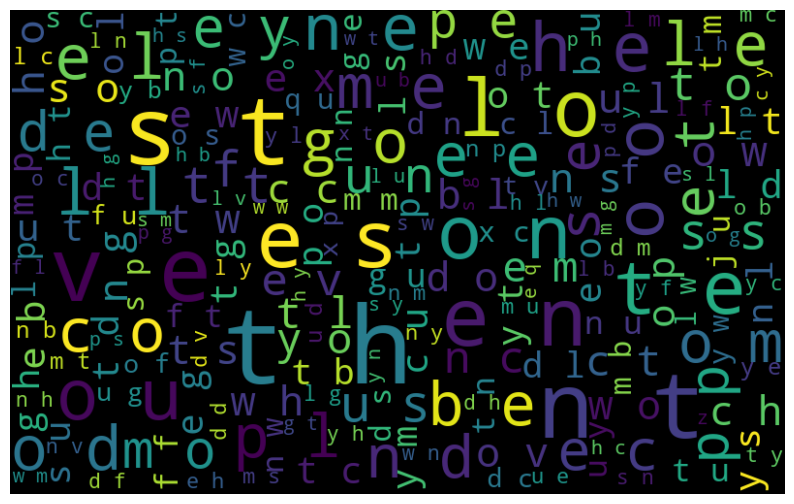

In [183]:
#NewCredit Loan App - Googleplay store
#Appstore
all_words_newcredit_google = ' '.join([text for text in newcredit_google1['title']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

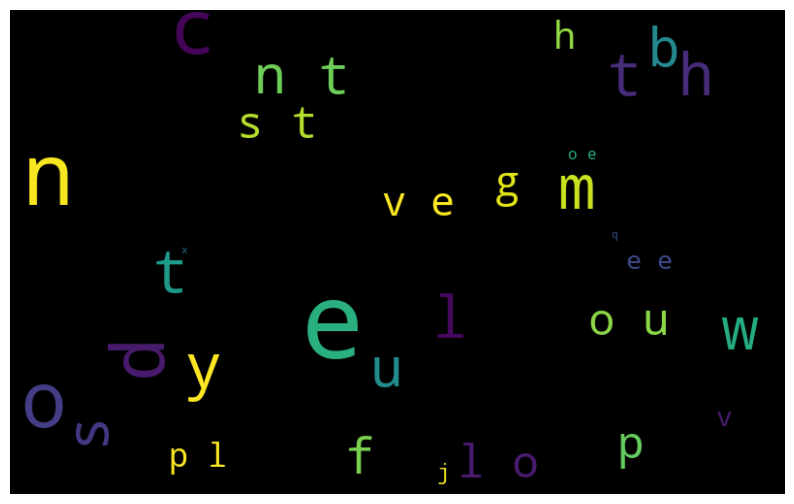

In [166]:
#NewCredit Loan App - Appstore
#Appstore
all_words_newcredit_apple = ' '.join([text for text in newcredit_app1['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

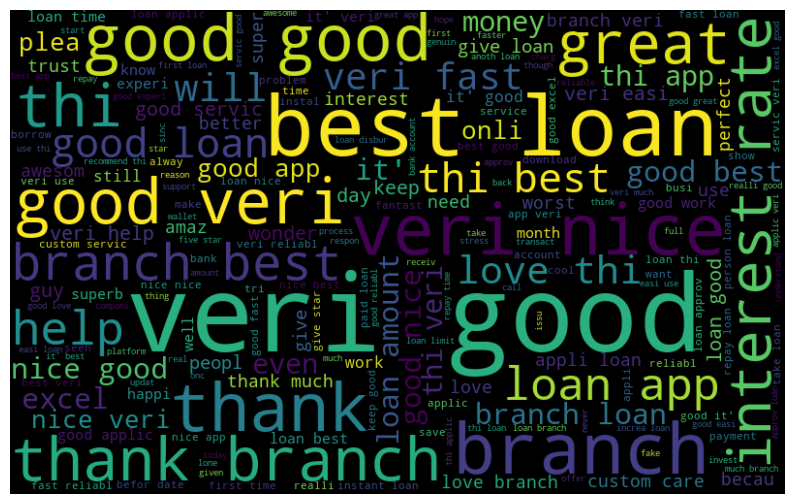

In [184]:
#Branch Loan App - Googleplay store
#Appstore
all_words_branch_google = ' '.join([text for text in branch['title']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_branch_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

''

In [210]:
#Carbon Loan App - Googleplay Store
#Appstore
# all_words_carbon_google = ' '.join([text for text in carbon_google1['title'] if isinstance(text, str)])
all_words_carbon_google = ' '.join([text for text in carbon_google1['title'] if isinstance(text, str)])
if all_words_carbon_google:
    #create word cloud
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
else:
    print("No words to create a word cloud.")

# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

No words to create a word cloud.


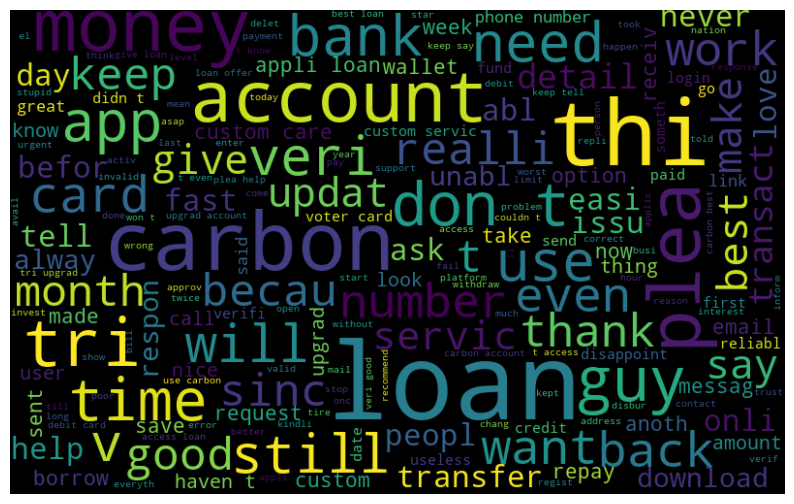

In [186]:
#Carbon Loan App - Appstore
#Appstore
all_words_carbon_apple = ' '.join([text for text in carbon_app1['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

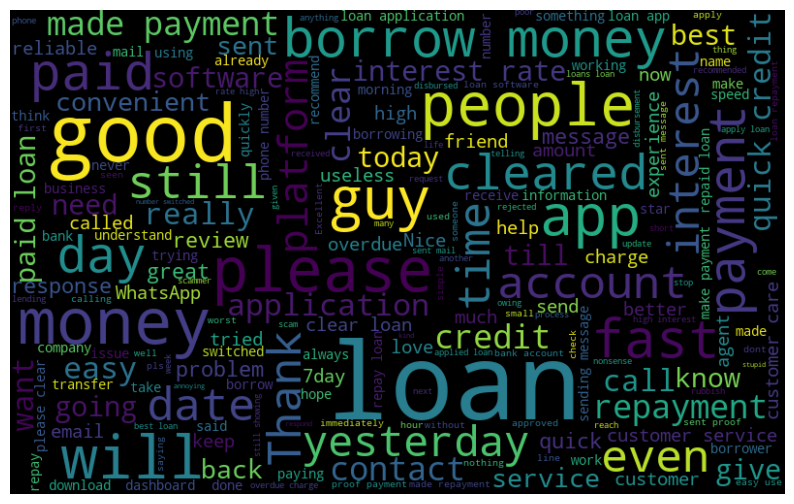

In [200]:
#Quickcredit Loan App - Google Play Store
#Appstore
all_words_quickcredit_google = ' '.join([text for text in quickcredit_google1['title']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

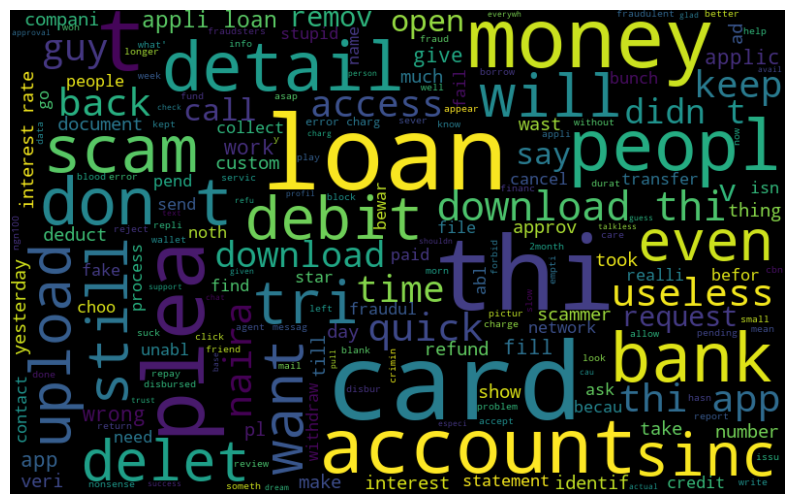

In [201]:
#Quickcredit Loan App - Appstore
#Appstore
all_words_quickcredit_apple = ' '.join([text for text in quickcredit_app1['review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Let’s visualize all the words our data using the wordcloud plot.



> Good/Positive Reviews

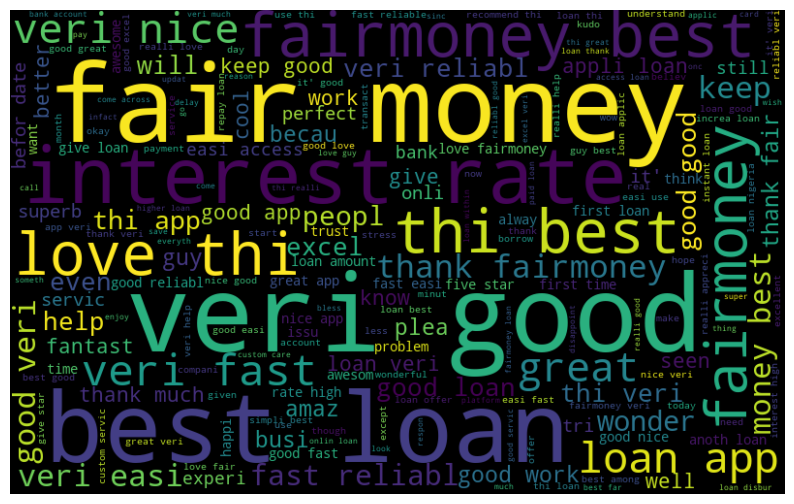

In [212]:
#Fairmoney Loan App
    #googleplay store
all_words_fairmoney = ' '.join([text for text in fairmoney["title"][fairmoney["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_fairmoney)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



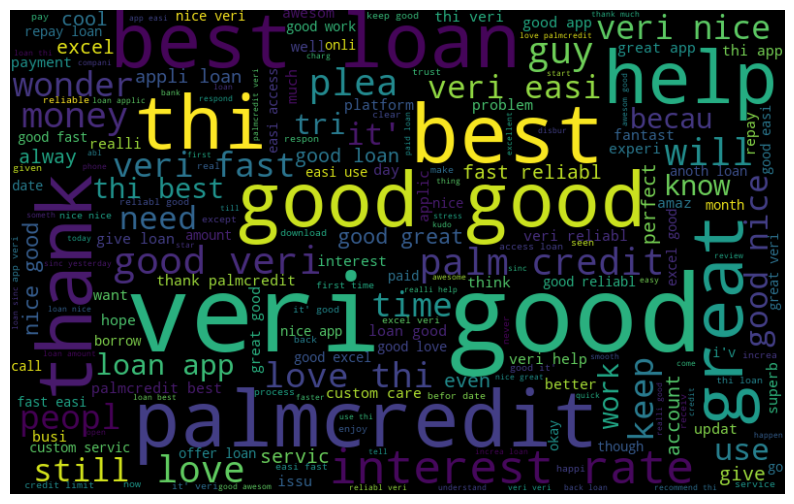

In [214]:
#Palmcredit Loan App
    #googleplay store
all_words_palmcredit = ' '.join([text for text in palmcredit["title"][palmcredit["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_palmcredit)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



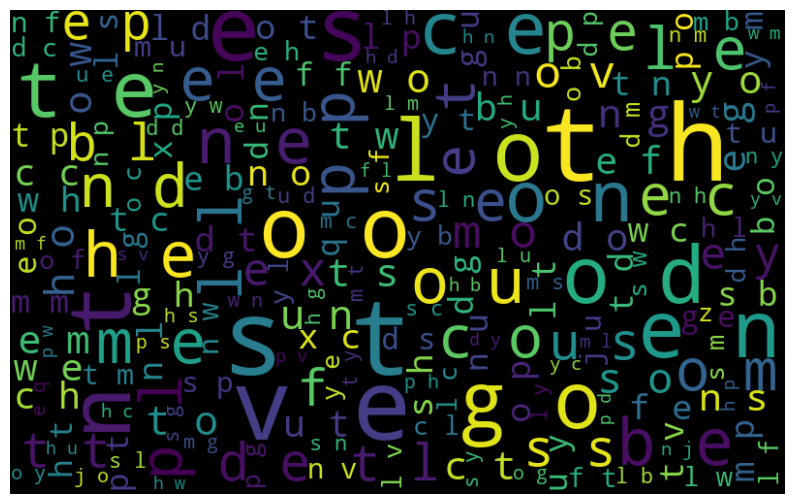

In [215]:
#NewCredit Loan App - Googleplay store
#Appstore
all_words_newcredit_google = ' '.join([text for text in newcredit_google1['title'] [newcredit_google1["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

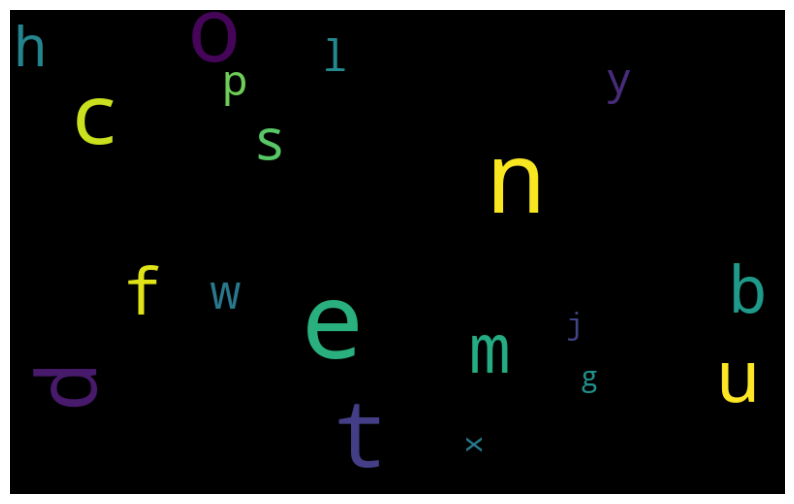

In [216]:
#NewCredit Loan App - Appstore
#Appstore
all_words_newcredit_apple = ' '.join([text for text in newcredit_app1['review'] [newcredit_app1["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

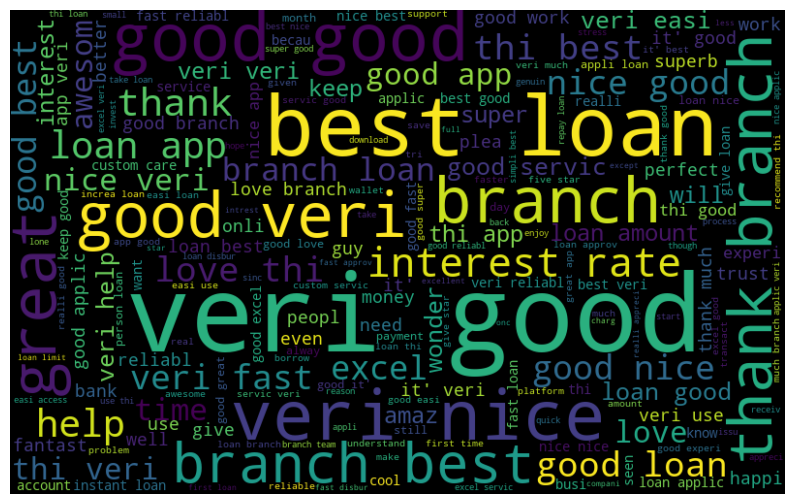

In [217]:
#Branch Loan App - Googleplay store
#Appstore
all_words_branch_google = ' '.join([text for text in branch['title'] [branch["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_branch_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [219]:
#Carbon Loan App - Googleplay Store
#Appstore
# all_words_carbon_google = ' '.join([text for text in carbon_google1['title'] if isinstance(text, str)])
all_words_carbon_google = ' '.join([text for text in carbon_google1['title'][carbon_google1["rating"] >= 3] if isinstance(text, str)])
if all_words_carbon_google:
    #create word cloud
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
else:
    print("No words to create a word cloud.")

# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

No words to create a word cloud.


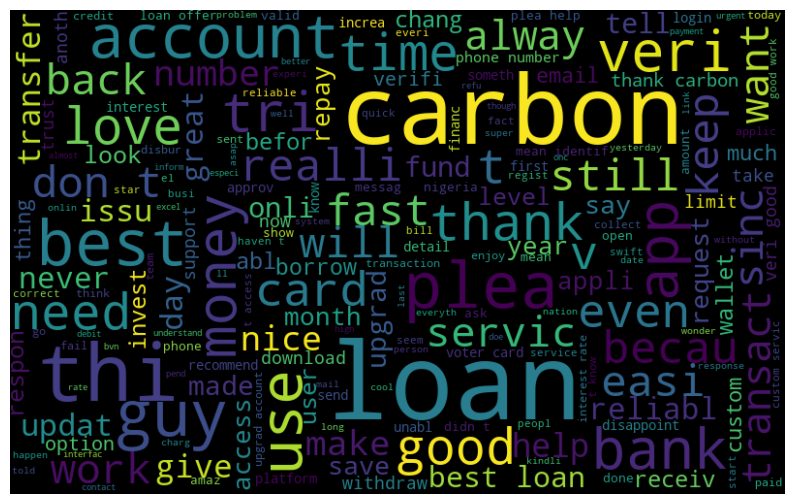

In [220]:
#Carbon Loan App - Appstore
#Appstore
all_words_carbon_apple = ' '.join([text for text in carbon_app1['review'] [carbon_app1["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

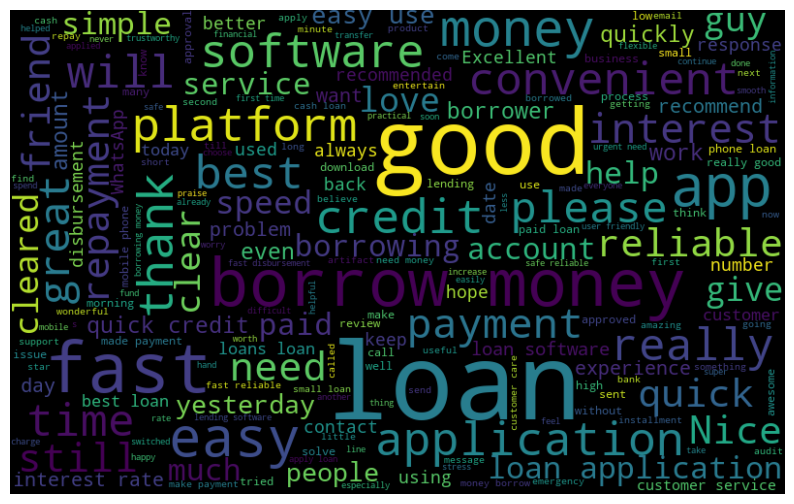

In [221]:
#Quickcredit Loan App - Google Play Store
#Appstore
all_words_quickcredit_google = ' '.join([text for text in quickcredit_google1['title'] [quickcredit_google1["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

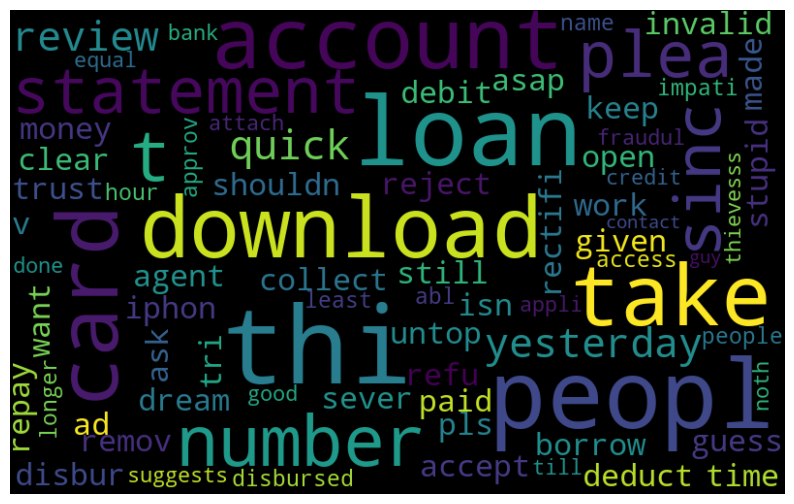

In [222]:
#Quickcredit Loan App - Appstore
#Appstore
all_words_quickcredit_apple = ' '.join([text for text in quickcredit_app1['review'] [quickcredit_app1["rating"] >= 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

> Bad/Negative Reviews

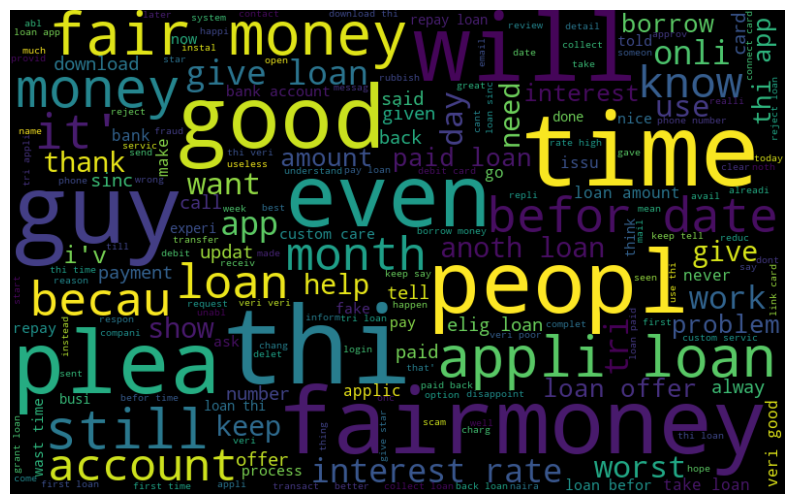

In [223]:
#Fairmoney Loan App
    #googleplay store
all_words_fairmoney = ' '.join([text for text in fairmoney["title"][fairmoney["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_fairmoney)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



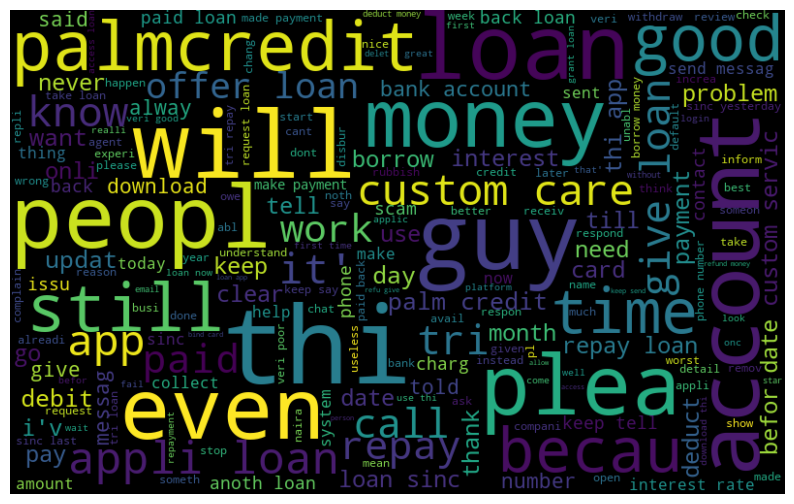

In [224]:
#Palmcredit Loan App
    #googleplay store
all_words_palmcredit = ' '.join([text for text in palmcredit["title"][palmcredit["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_palmcredit)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



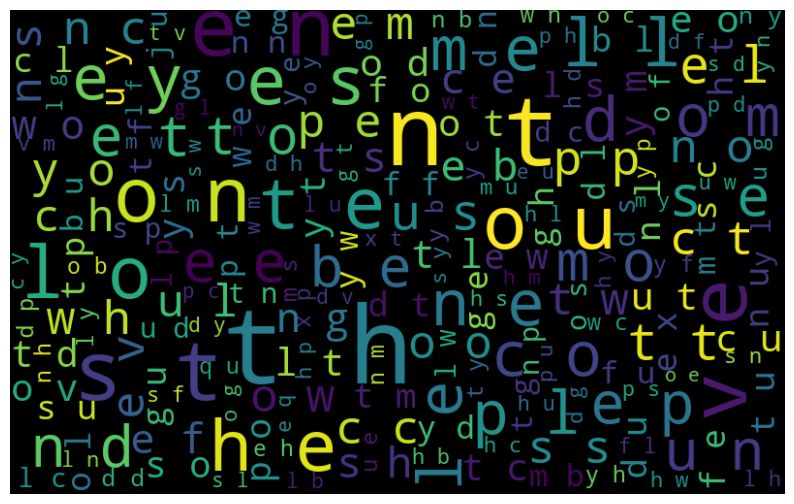

In [225]:
#NewCredit Loan App - Googleplay store
#Appstore
all_words_newcredit_google = ' '.join([text for text in newcredit_google1['title'] [newcredit_google1["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

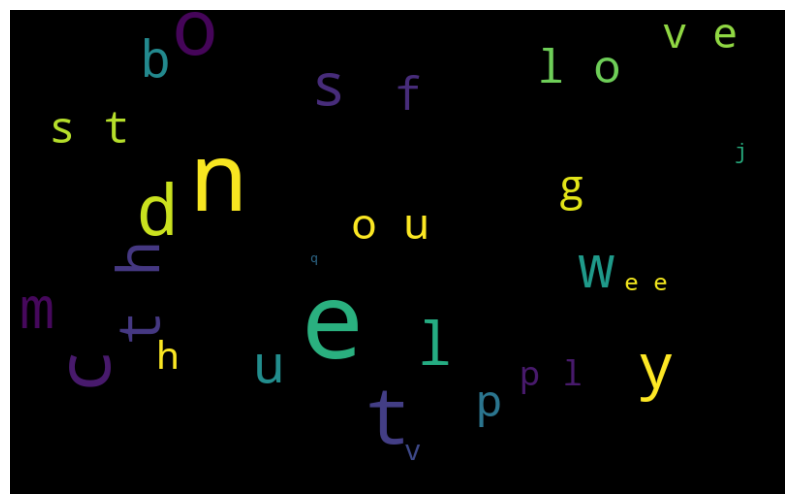

In [226]:
#NewCredit Loan App - Appstore
#Appstore
all_words_newcredit_apple = ' '.join([text for text in newcredit_app1['review'] [newcredit_app1["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_newcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

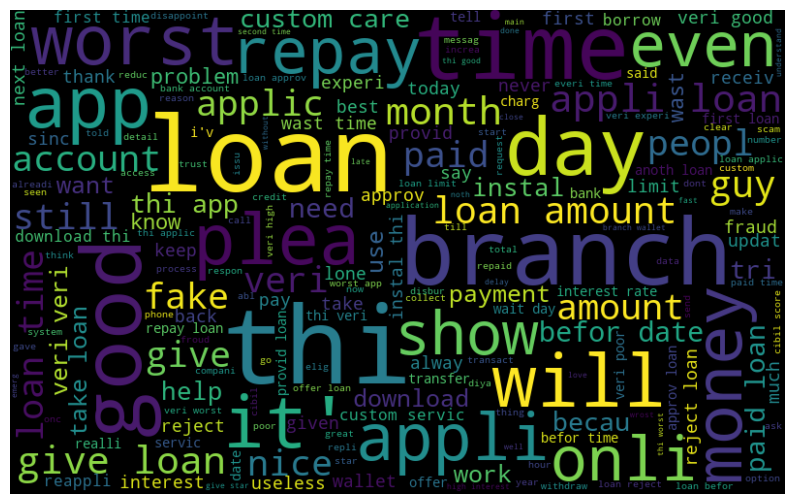

In [227]:
#Branch Loan App - Googleplay store
#Appstore
all_words_branch_google = ' '.join([text for text in branch['title'] [branch["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_branch_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [228]:
#Carbon Loan App - Googleplay Store
#Appstore
# all_words_carbon_google = ' '.join([text for text in carbon_google1['title'] if isinstance(text, str)])
all_words_carbon_google = ' '.join([text for text in carbon_google1['title'][carbon_google1["rating"] < 3] if isinstance(text, str)])
if all_words_carbon_google:
    #create word cloud
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
else:
    print("No words to create a word cloud.")

# from wordcloud import WordCloud
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_google)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()

No words to create a word cloud.


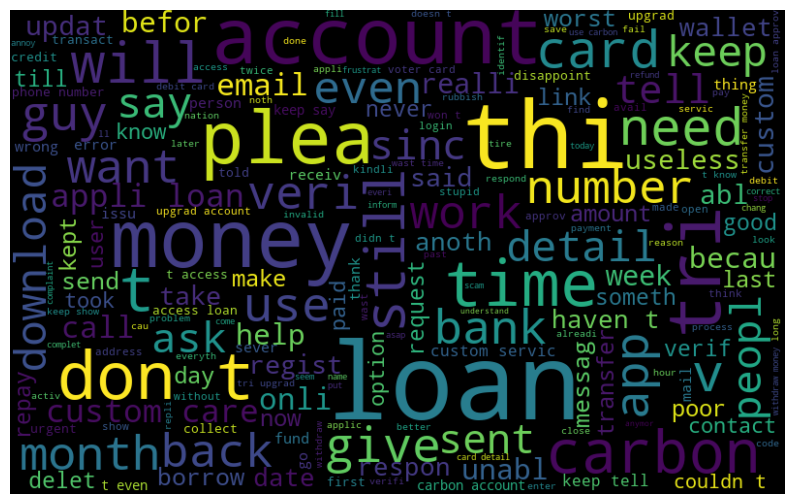

In [229]:
#Carbon Loan App - Appstore
#Appstore
all_words_carbon_apple = ' '.join([text for text in carbon_app1['review'] [carbon_app1["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_carbon_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

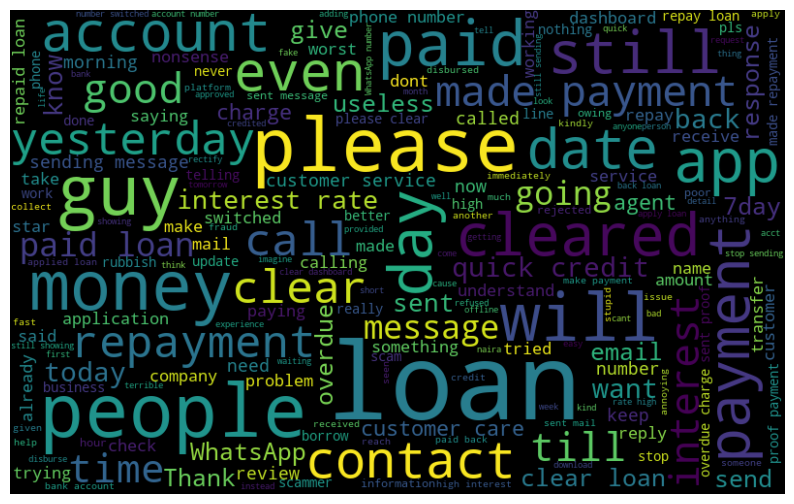

In [230]:
#Quickcredit Loan App - Google Play Store
#Appstore
all_words_quickcredit_google = ' '.join([text for text in quickcredit_google1['title'] [quickcredit_google1["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_google)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

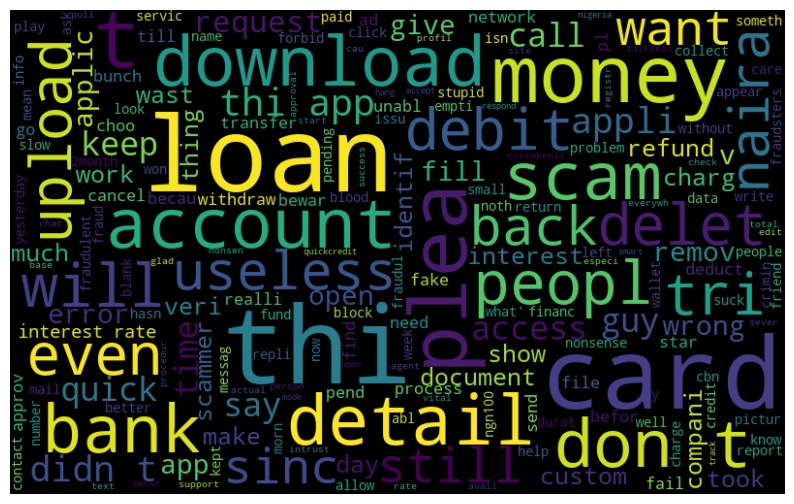

In [231]:
#Quickcredit Loan App - Appstore
#Appstore
all_words_quickcredit_apple = ' '.join([text for text in quickcredit_app1['review'] [quickcredit_app1["rating"] < 3]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_quickcredit_apple)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

> Visualizing some of the positive and negative words used in the reviews

In [ ]:
#Non-Racist/Sexist reviews (Good reviews)
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
#Racist/Sexist reviews (Bad reviews)
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

###### Extracting Features from Cleaned Tweets

In [ ]:
#To analyze a preprocessed data, it needs to be converted into features. 
#Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, 
#TF-IDF, and Word Embeddings. In this article, we will be covering only Bag-of-Words and TF-IDF.


> Bag-of-Words Features

In [245]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow_fairmoney = bow_vectorizer.fit_transform(fairmoney["title"])
bow_palmcredit = bow_vectorizer.fit_transform(palmcredit["title"])
bow_branch = bow_vectorizer.fit_transform(branch["title"])

bow_quickcredit_google = bow_vectorizer.fit_transform(quickcredit_google1["title"])
bow_quickcredit_apple = bow_vectorizer.fit_transform(quickcredit_app1["review"])

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
newcredit_google1["title"] = newcredit_google1["title"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
bow_newcredit_google = bow_vectorizer.fit_transform(newcredit_google1["title"])

# bow_newcredit_google = bow_vectorizer.fit_transform(newcredit_google1["title"])
bow_newcredit_apple = bow_vectorizer.fit_transform(newcredit_app1["review"])

bow_carbon_google = bow_vectorizer.fit_transform(carbon_google1["title"])
bow_carbon_apple = bow_vectorizer.fit_transform(carbon_app1["review"])


ValueError: empty vocabulary; perhaps the documents only contain stop words

> TF-IDF Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf_fairmoney = tfidf_vectorizer.fit_transform(fairmoney["title"])
tfidf_palmcredit = tfidf_vectorizer.fit_transform(palmcredit["title"])
tfidf_branch = tfidf_vectorizer.fit_transform(branch["title"])

tfidf_quickcredit_google = tfidf_vectorizer.fit_transform(quickcredit_google1["title"])
tfidf_quickcredit_apple = tfidf_vectorizer.fit_transform(quickcredit_app1["review"])

tfidf_newcredit_google = tfidf_vectorizer.fit_transform(newcredit_google1["title"])
tfidf_newcredit_apple = tfidf_vectorizer.fit_transform(newcredit_app1["review"])

tfidf_carbon_google = tfidf_vectorizer.fit_transform(carbon_google1["title"])
tfidf_carbon_apple = tfidf_vectorizer.fit_transform(carbon_app1["review"])

##### Model Building: Sentiment Analysis

###### Building model using Bag-of-Words features

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Spliting data into train and test
train_bow_fairmoney, test_bow_fairmoney = train_test_split(bow_fairmoney, test_size=0.2, random_state=42)
train_bow_palmcredit, test_bow_palmcredit = train_test_split(bow_palmcredit, test_size=0.2, random_state=42)
train_bow_branch, test_bow_branch = train_test_split(bow_branch, test_size=0.2, random_state=42)

train_bow_quickcredit_google, test_bow_quickcredit_google = train_test_split(bow_quickcredit_google, test_size=0.2, random_state=42)
train_bow_quickcredit_apple, test_bow_quickcredit_apple = train_test_split(bow_quickcredit_apple, test_size=0.2, random_state=42)

train_bow_newcredit_google, test_bow_newcredit_google = train_test_split(bow_newcredit_google, test_size=0.2, random_state=42)
train_bow_newcredit_apple, test_bow_newcredit_apple = train_test_split(bow_newcredit_apple, test_size=0.2, random_state=42)

train_bow_carbon_google, test_bow_carbon_google = train_test_split(bow_carbon_google, test_size=0.2, random_state=42)
train_bow_carbon_apple, test_bow_carbon_apple = train_test_split(bow_carbon_apple, test_size=0.2, random_state=42)


# splitting train data further into training and validation set
xtrain_train_bow_fairmoney, xvalid_train_bow_fairmoney, ytrain_train_bow_fairmoney, yvalid_train_bow_fairmoney = train_test_split(train_bow_fairmoney, train_bow_fairmoney['rating'], random_state=42, test_size=0.3)
xtrain_train_bow_palmcredit, xvalid_train_bow_palmcredit, ytrain_train_bow_palmcredit, yvalid_train_bow_palmcredit = train_test_split(train_bow_palmcredit, train_bow_palmcredit['rating'], random_state=42, test_size=0.3)
xtrain_train_bow_branch, xvalid_train_bow_branch, ytrain_train_bow_branch, yvalid_train_bow_branch = train_test_split(train_bow_branch, train_bow_branch['rating'], random_state=42, test_size=0.3)

xtrain_train_bow_quickcredit_google, xvalid__train_bow_quickcredit_google, ytrain_train_bow_quickcredit_google, yvalid_train_bow_quickcredit_google = train_test_split(train_bow_quickcredit_google, train_bow_quickcredit_google['rating'], random_state=42, test_size=0.3)
xtrain_train_bow_quickcredit_apple, xvalid_train_bow_quickcredit_apple, ytrain_train_bow_quickcredit_apple, yvalid_train_bow_quickcredit_apple = train_test_split(train_bow_quickcredit_apple, train_bow_quickcredit_apple['rating'], random_state=42, test_size=0.3)

xtrain_train_bow_newcredit_google, xvalid_train_bow_newcredit_google, ytrain_train_bow_newcredit_google, yvalid_train_bow_newcredit_google = train_test_split(train_bow_newcredit_google, train_bow_newcredit_google['rating'], random_state=42, test_size=0.3)
xtrain_train_bow_newcredit_apple, xvalid_train_bow_newcredit_apple, ytrain_train_bow_newcredit_apple, yvalid_train_bow_newcredit_apple = train_test_split(train_bow_newcredit_apple, train_bow_newcredit_apple['rating'], random_state=42, test_size=0.3)

xtrain_train_bow_carbon_google, xvalid_train_bow_carbon_google, ytrain_train_bow_carbon_google, yvalid_train_bow_carbon_google = train_test_split(train_bow_carbon_google, train_bow_carbon_google['rating'], random_state=42, test_size=0.3)
xtrain_train_bow_carbon_apple, xvalid_train_bow_carbon_apple, ytrain_train_bow_carbon_apple, yvalid_train_bow_carbon_apple = train_test_split(train_bow_carbon_apple, train_bow_carbon_apple['rating'], random_state=42, test_size=0.3)




NameError: name 'bow_newcredit_google' is not defined

In [ ]:
#fairmoney train

lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_fairmoney, ytrain_train_bow_fairmoney) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_fairmoney) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_fairmoney, prediction_int) # calculating f1 score

In [ ]:
#fairmoney test
test_pred = lreg.predict_proba(test_bow_fairmoney)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_fairmoney['rating'] = test_pred_int
submission = test_bow_fairmoney['rating']
submission.to_csv('fairmoney_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#palmcredit train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_palmcredit, ytrain_train_bow_palmcredit) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_palmcredit) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_palmcredit, prediction_int) # calculating f1 score

In [ ]:
#palmcredit test
test_pred = lreg.predict_proba(test_bow_palmcredit)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_palmcredit['rating'] = test_pred_int
submission = test_bow_palmcredit['rating']
submission.to_csv('palmcredit_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#branch train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_branch, ytrain_train_bow_branch) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_branch) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_branch, prediction_int) # calculating f1 score

In [ ]:
#branch test
test_pred = lreg.predict_proba(test_bow_branch)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_branch['rating'] = test_pred_int
submission = test_bow_branch['rating'] 
submission.to_csv('branch_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Quickcredit Google train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_quickcredit_google, ytrain_train_bow_quickcredit_google) # training the model

prediction = lreg.predict_proba(xvalid__train_bow_quickcredit_google) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_quickcredit_google, prediction_int) # calculating f1 score

In [ ]:
#Quickcredit Google test
test_pred = lreg.predict_proba(test_bow_quickcredit_google)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_quickcredit_google['rating'] = test_pred_int
submission = test_bow_quickcredit_google['rating']
submission.to_csv('quickcredit-google_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Quickcredit Apple Train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_quickcredit_apple, ytrain_train_bow_quickcredit_apple) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_quickcredit_apple) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_quickcredit_apple, prediction_int) # calculating f1 score

In [ ]:
#Quickcredit Apple Test
test_pred = lreg.predict_proba(test_bow_quickcredit_apple)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_quickcredit_apple['rating'] = test_pred_int
submission = test_bow_quickcredit_apple['rating']
submission.to_csv('quickcredit-apple_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Newcredit Google Train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_newcredit_google, ytrain_train_bow_newcredit_google) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_newcredit_google) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_newcredit_google, prediction_int) # calculating f1 score

In [ ]:
#Newcredit Google Test
test_pred = lreg.predict_proba(test_bow_newcredit_google)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_newcredit_google['rating'] = test_pred_int
submission = test_bow_newcredit_google['rating']
submission.to_csv('newcredit-google_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Newcredit Apple Train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_newcredit_apple, ytrain_train_bow_newcredit_apple) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_newcredit_apple) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_newcredit_apple, prediction_int) # calculating f1 score

In [ ]:
#Newcredit Apple Test
test_pred = lreg.predict_proba(test_bow_newcredit_apple)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_newcredit_apple['rating'] = test_pred_int
submission = test_bow_newcredit_apple['rating'] 
submission.to_csv('newcredit-apple_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Carbon Google Train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_carbon_google, ytrain_train_bow_carbon_google) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_carbon_google) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_carbon_google, prediction_int) # calculating f1 score

In [ ]:
#Carbon Google Test
test_pred = lreg.predict_proba(test_bow_carbon_google) 
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_carbon_google['rating'] = test_pred_int
submission = test_bow_carbon_google['rating'] 
submission.to_csv('carbon-google_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
#Carbon Apple Train
lreg = LogisticRegression()
lreg.fit(xtrain_train_bow_carbon_apple, ytrain_train_bow_carbon_apple) # training the model

prediction = lreg.predict_proba(xvalid_train_bow_carbon_apple) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_train_bow_carbon_apple, prediction_int) # calculating f1 score

In [ ]:
#Carbon Apple Test
test_pred = lreg.predict_proba(test_bow_carbon_apple)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_bow_carbon_apple['rating'] = test_pred_int
submission = test_bow_carbon_apple['rating']  
submission.to_csv('carbon-apple_lreg_bow.csv', index=False) # writing data to a CSV file

We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.53 for the validation set. Now we will use this model to predict for the test data

###### Building model using TF-IDF features

In [ ]:
# train_tfidf = tfidf[:31962,:]
# test_tfidf = tfidf[31962:,:]

# xtrain_tfidf = train_tfidf[ytrain.index]
# xvalid_tfidf = train_tfidf[yvalid.index]

# lreg.fit(xtrain_tfidf, ytrain)

# prediction = lreg.predict_proba(xvalid_tfidf)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)

# f1_score(yvalid, prediction_int)

In [ ]:
'''
Let’s talk about what matters and what doesn’t matter in Sentiment Analysis. 
Words are the most important part (to an extent that we will talk about in the upcoming section). 
However, when it comes to things like punctuation, you cannot get the sentiment from punctuation. 
Therefore, punctuation does not matter to Sentiment Analysis. 
Moreover, tweet components like images, videos, URLs, usernames, emojis, etc. 
do not contribute to the polarity (whether it is positive or negative) of the tweet. However, 
this is only true for this application. For instance, in another application, 
you could have a Deep Learning image classifier that learns and predicts whether this image 
that the tweet contains stands for something positive (e.g. a rainbow) or negative (e.g. a tank). 
When it comes to the technicality, both Sentiment Analysis and Deep Learning fall under Machine Learning. 
In fact, you can perform Sentiment Analysis through Deep Learning, but that’s a story for another day.

'''

In [ ]:
# import re
# from nltk.tokenize import word_tokenize
# from string import punctuation 
# from nltk.corpus import stopwords 

# class PreProcessTweets:
#     def __init__(self):
#         self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
#     def processTweets(self, list_of_tweets):
#         processedTweets=[]
#         for tweet in list_of_tweets:
#             processedTweets.append((self._processTweet(tweet["text"]),tweet["label"]))
#         return processedTweets
    
#     def _processTweet(self, tweet):
#         tweet = tweet.lower() # convert text to lower-case
#         tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
#         tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
#         tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
#         tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
#         return [word for word in tweet if word not in self._stopwords]